In [2]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
54256,54256,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,"3,429,979.0",NaN,nan,...,82.0,"1,951.219512195122","1,951.219512195122",nan,3.0,nan,http://www.properati.com.ar/19mpv_venta_depart...,Muy buen departamento ya escriturado. Living c...,Bustamante Propiedades | North Ville en Venta,https://thumbs4.properati.com/3/LbX80D-i0c3Ps5...
11352,11352,sell,apartment,Saavedra,|Argentina|Capital Federal|Saavedra|,Argentina,Capital Federal,"3,429,422.0",NaN,nan,...,47.0,"2,058.8235294117653","2,978.723404255319",1.0,nan,nan,http://www.properati.com.ar/16bck_venta_depart...,Excelente departamento al frente a estrenar. L...,"Departamento 68m² con Plantas en Pinto, Gral. ...",https://thumbs4.properati.com/2/wcf68gKvx19UXi...
84621,84621,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,"3,433,775.0",NaN,nan,...,49.0,nan,nan,nan,nan,nan,http://www.properati.com.ar/1b1xj_venta_depart...,BBU2956 AP192223,EVOQUE,https://thumbs4.properati.com/5/KoHYK6-2CUEnpu...
74999,74999,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,"3,430,863.0",NaN,nan,...,44.0,"1,800.0","1,800.0",nan,nan,nan,http://www.properati.com.ar/1apq1_venta_depart...,Monoambiente de 44 m2 al frenteventa en pozo f...,Monoambiente venta en pozo,https://thumbs4.properati.com/9/GyRJBhYhv1uI4g...
116474,116474,sell,house,Open Door,|Argentina|Buenos Aires Interior|Luján|Open Door|,Argentina,Buenos Aires Interior,"3,430,287.0","-34.4971739,-59.0789221",-34.4971739,...,200.0,200.0,250.0,nan,5.0,nan,http://www.properati.com.ar/1ccd2_venta_casa_o...,Venta sólo contado SIN FINANCIACIÓN. Casa fren...,Casa venta,https://thumbs4.properati.com/4/9Wc-Lr9p0t0hN1...
87590,87590,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,"3,860,259.0",NaN,nan,...,50.0,"1,003.8978","17,900.0",nan,nan,nan,http://www.properati.com.ar/1b64p_venta_depart...,ALBERDI. DUARTE QUIROZ AL 2400. A 10 CUADRAS D...,Departamento - Alberdi,https://thumbs4.properati.com/7/-lK8c7Of9oYP3y...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [4]:
# Columna price_usd_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_usd_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_usd_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_usd_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 52603
Porcentaje de registros con NaN: 43.394654347467416
Contamos cantidad de registros unicos:
         price_usd_per_m2  count
0                     0.6      1
1                     1.0      1
2      1.1845710280373831      1
3      1.2369857009345795      1
4      1.5734420828905418      1
...                   ...    ...
25562  78,533.33333333331      1
25563            80,000.0      1
25564 104,486.11428571428      1
25565 173,826.06666666668      1
25566 206,333.33333333328      1

[25567 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

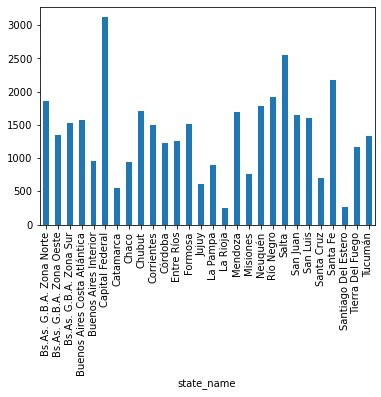

In [5]:
#graficamos el dato por Estado con el fin de observar los rangos de precios en dolares por metro cuadrado
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['price_usd_per_m2'].mean().plot.bar()

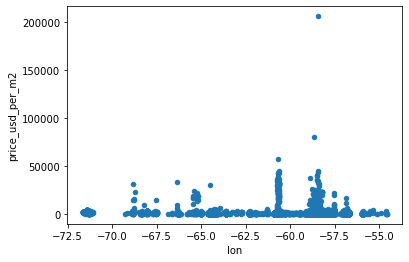

In [18]:
#graficamos un plot para visualizar la dispersión del precio por metro cuadrado en dolares por longitud 
# y observamos como los valores más extremos precios en USD por metro cuadrado se ubican en en la longitud cercana a -58 y -61
my_plot_surface_total = data.plot("lon", "price_usd_per_m2", kind="scatter")
plt.show()

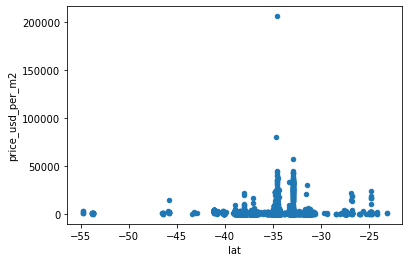

In [19]:
#graficamos un plot para visualizar la dispersión del precio por metro cuadrado en dolares por latitud
# y observamos como los valores más extremos precios en USD por metro cuadrado se ubican en en la latitud cercana a -35
my_plot_surface_total = data.plot("lat", "price_usd_per_m2", kind="scatter")
plt.show()

In [6]:
data.price_usd_per_m2.describe()

count              68,617.0
mean     2,160.086915888256
std     2,759.2886214684504
min                     0.6
25%     1,218.1818181818182
50%                 1,800.0
75%     2,486.4117647058824
max     206,333.33333333328
Name: price_usd_per_m2, dtype: float64

Detalle de análisis de columnas:
* `price_usd_per_m2` -> Esta columna tiene 52.603 datos nulos o su equivalente 43.39%. Consideramos que esta variable es relevante para la proyección, por esta razón consideramos que podriamos completarla realizando diferentes operaciones:
1. Extrayendo el dato de las columnas description y title
2. Calculando el valor al dividir el precio aprox en usd entre la superficie en m2
3. Calculando un valor promedio por metro cuadrado en cada estado para cada tipo de propiedad.

### Detalle de valores extremos en la  columna `price_usd_per_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar 6 datos que se alejan significativamente de la media principalmente en el tipo de propiedad apartamentos.

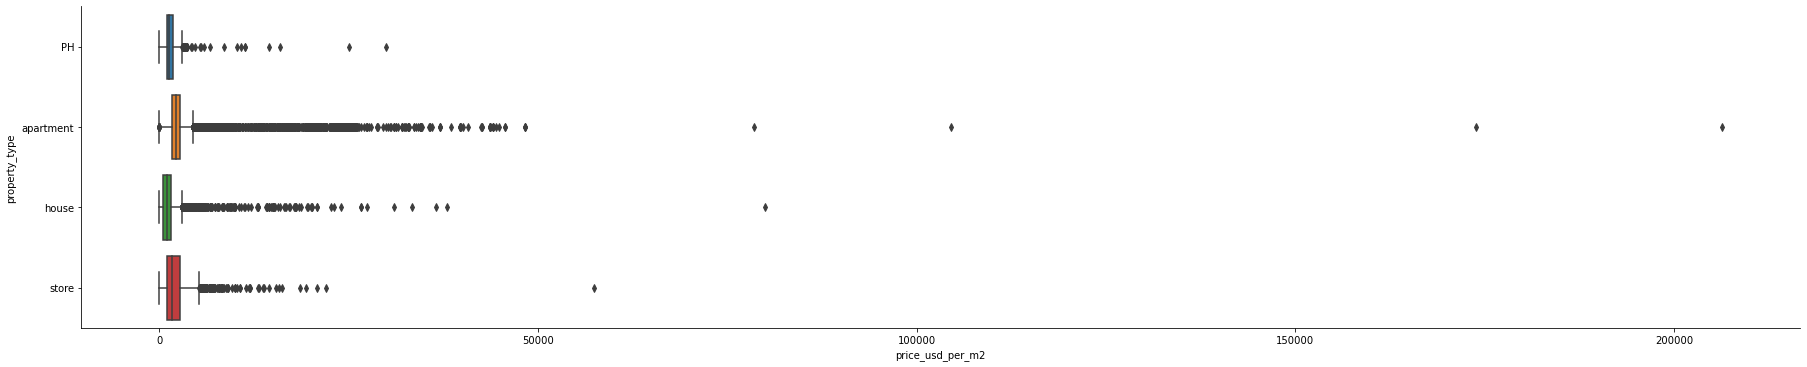

In [7]:
sns.catplot(data=data, x= 'price_usd_per_m2', y="property_type", kind="box", height=5, aspect=5,)


Calculo de información a partir de las columnas normalizadas de Superficie y precio aprox en dolares

In [17]:
#tomamos los datos no nulos de price_usd_per_m2 para podr calcular la media de esos datos por barrio pero no vamos a tomar todos los datos sino que tomaremos 
#los datos hasta el quantil 90


datos_no_nulos_precio_usd_m2=data.price_usd_per_m2.notnull()
precio_usd_m2_calculado=data.groupby('place_name').datos_no_nulos_precio_usd_m2

data['price_usd_per_m2'].fillna(data.precio_usd_m2_calculado].mean(), inplace:True)

AttributeError: 'DataFrameGroupBy' object has no attribute 'datos_no_nulos_precio_usd_m2'

##Calculo de la columna Price_usd_covered_per_m2

Calculo de información a partir de las columnas normalizadas de Superficie y precio aprox en dolares